# UNIVARIATE EDA - {"CUSTOMER CHURN" DATASET}

## 1. Import Modules and Configuration Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Pandas Settings

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

## 2. Import Dataset

In [3]:
data = pd.read_pickle('cc_train_pp.pkl')
df = data.copy()

## 3. Univariate EDA

### 3.1 Sample of the Dataset

In [4]:
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1324,IL,179,area_code_408,no,no,0,234.5,134,39.87,164.2,94,13.96,191.4,72,8.61,6.1,4,1.65,1,no
763,GA,50,area_code_408,no,yes,24,214.3,129,36.43,289.8,55,24.63,312.5,130,14.06,10.6,4,2.86,1,no
105,MS,162,area_code_415,no,no,0,70.7,108,12.02,157.5,87,13.39,154.8,82,6.97,9.1,3,2.46,4,yes
3742,MO,103,area_code_415,no,yes,34,240.6,92,40.90,204.2,99,17.36,297.0,82,13.37,12.7,9,3.43,5,no
1280,WA,104,area_code_415,no,no,0,139.7,78,23.75,202.6,119,17.22,203.6,102,9.16,11.3,5,3.05,2,no


### 3.2 Shape of the Dataset

In [5]:
print(f'No. of Observations (rows) : {df.shape[0]}')
print(f'No. of Features (columns)  : {df.shape[1]}')

No. of Observations (rows) : 4050
No. of Features (columns)  : 20


### 3.3 Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 3199 to 2286
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4050 non-null   object 
 1   account_length                 4050 non-null   int64  
 2   area_code                      4050 non-null   object 
 3   international_plan             4050 non-null   object 
 4   voice_mail_plan                4050 non-null   object 
 5   number_vmail_messages          4050 non-null   int64  
 6   total_day_minutes              4050 non-null   float64
 7   total_day_calls                4050 non-null   int64  
 8   total_day_charge               4050 non-null   float64
 9   total_eve_minutes              4050 non-null   float64
 10  total_eve_calls                4050 non-null   int64  
 11  total_eve_charge               4050 non-null   float64
 12  total_night_minutes            4050 non-null   flo

### 3.4 Features Specific to a Datatype

In [7]:
print(f'Number of Unique Data Types : {df.dtypes.nunique()}')
print(f'Unique Data Types : {df.dtypes.unique().tolist()}')

Number of Unique Data Types : 3
Unique Data Types : [dtype('O'), dtype('int64'), dtype('float64')]


In [8]:
fea_flo = df.select_dtypes(include='float64').columns.values.tolist()
fea_int = df.select_dtypes(include='int64').columns.values.tolist()
fea_obj = df.select_dtypes(include='object').columns.values.tolist()

print(f'Float Type Features    : {len(fea_flo)} \n{fea_flo} \n\n')
print(f'Integer Type Features  : {len(fea_int)} \n{fea_int} \n\n')
print(f'Object Type Features   : {len(fea_obj)} \n{fea_obj}')

Float Type Features    : 8 
['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge'] 


Integer Type Features  : 7 
['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls'] 


Object Type Features   : 5 
['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


### 3.5 Utility Functions

In [9]:
# To detect percentge of missing values in the features

def miss_cnt_pct(col):
    miss_cnt = df[col].isna().sum()
    miss_pct = (miss_cnt/df[col].shape[0])*100
    
    print(f'"{col}" has {miss_cnt} missing values, which is {round(miss_pct,4)} %. \n')

In [10]:
# To detect percentage of outliers present in the 'float' or 'int' type feature

def outlier_pct_detect(fea):
    q1,q3 = df[fea].quantile([0.25,0.75])
    print(f'1st Quartile : {q1} and 3rd Quartile : {q3}')
    
    lb = round(q1 - (q3-q1)*1.5,4)
    ub = round(q3 + (q3-q1)*1.5,4)
    print(f'Lower Bound : {lb} and Higher Bound : {ub} \n')
    
    filtl = df[fea] < lb
    out_low = df[filtl]
    print(f'No. of Outliers below Lower Bound ({lb}) are : {out_low.shape[0]}')
    
    filtu = df[fea] > ub
    out_high = df[filtu]
    print(f'No. of Outliers above Upper Bound ({ub}) are : {out_high.shape[0]}')
    
    out_df = df[(filtl | filtu)]
    print(f'Total No. of Outliers are : {out_df.shape[0]} \n')
        
    per = (out_df.shape[0]/df[fea].shape[0])*100
    print(f'Percentage of Outliers Records are : {round(per,4)} % \n')

In [11]:
# To analyze the individual 'float' or 'int' type feature

def uni_flo_int(df,col):
    print(f'Name of the Feature : "{col}" \n')
    
                            ####################### FEATURE SUMMARY CODE ######################
    print('-------- FEATURE DESCRIPTIVE STATISTICS SUMMARY ---------')
    print(df[col].describe(), '\n')
    
    print('----------------- FEATURE SHAPE SUMMARY ----------------')
    print(f'Skewness : {df[col].skew()}')
    print(f'Kurtosis : {df[col].kurt()} \n')
    
                            ######################### MISSING VALUE COUNT CODE ##############
    print('----------------- MISSING VALUE SUMMARY ----------------')
    miss_cnt_pct(col)

                            ######################### OUTLIER DETECTION CODE ################
    print('------------------- OUTLIER SUMMARY --------------------')
    outlier_pct_detect(col)

                            ############################ HISTOGRAM CODE #####################
    fig1 = px.histogram(df, x=col, title=f'Freq. Dist of "{col}"', text_auto=True, nbins=20, 
                        height=500, width=750, template='simple_white') 
    fig1.show()

                            ######################## DISTPLOT CODE #########################
    hist_data = [df[col].tolist()]            
    group_labels = [col]                                 
        
    # Create distplot with curve_type set to 'kde'
    fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, bin_size=1, 
                              colors=['rgb(158, 185, 243)'])
    fig2.update_layout(title=f'KDE of "{col}"', yaxis_title="Probability Distribution",
                       height=500, width=750, template='simple_white')
    fig2.show()
                              
                            ############################ BOXPLOT CODE ########################   
    fig3 = px.box(df, y=col, title=f'Data Dist. of {col}', notched=True, points='all',
                  height=500, width=750, template='simple_white') 
    fig3.show()


In [12]:
# To analyze the individual 'object' or 'category' type feature
# If category has labels less than 5, then both 'pie' and 'bar' will be displayed
# If category has labels 10 or more than 10, then only 'bar' will be displayed 

def val_cnt_pct(df, col):
    cnt = df[col].value_counts()
    pct = df[col].value_counts(normalize=True)*100
    val_cnt_pct = pd.concat([cnt,pct], axis=1, keys=['Count','Percent']).reset_index()

    cats = len(val_cnt_pct)
    
    if cats <= 10:
        print(f'Total Categories : {cats} \n')
        ser = val_cnt_pct.head(cats)
        print(f'Showing Top "{cats}" Categories of "{col}" Feature \n\n')
        print(ser)

        if cats <=5:
            print('\n\n')

###################################################### PIE-PLOT CODE ###########################################################
            fig4=px.pie(ser, names=col, values='Count', labels={col:col.title(),'count':'Count'}, height=400, width=400,
                       hole=0.6, template='simple_white')            
            fig4.show()
       
    else:
        print(f'Total Categories : {cats} \n')
        ser = val_cnt_pct.head(10)
        print(f'Showing Top "{10}" Categories of "{col}" Feature \n\n')
        print(ser)

    print('\n\n')

###################################################### BARPLOT CODE ###########################################################
    fig5 = px.bar(ser, x=col, y='Count', height=500, width=750, text_auto=True, template='simple_white')       
    fig5.show()


In [13]:
def uni_obj_cat(df,col):
    print(f'Name of the Feature : "{col}" \n')
    
                            ######################### FEATURE SUMMARY CODE ##############
    print('-------- FEATURE DESCRIPTIVE STATISTICS SUMMARY ---------')
    print(df[col].describe(), '\n')
    
                            ######################### MISSING VALUE COUNT CODE ##############
    print('----------------- MISSING VALUE SUMMARY ----------------')    
    miss_cnt_pct(col)

                            ######################### CLASS DISTRIBUTION CODE ##############
    print('-------------- FEATURE CLASS DISTRIBUTION ---------------')
    val_cnt_pct(df,col)

### 3.6 Analyizing Individual "numeric" Type Features

In [14]:
fea_num = fea_flo+fea_int
fea_num

['total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge',
 'account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls']

In [15]:
df[fea_num].describe()

,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls
count,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000,4050.000,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000,4050.0000
mean,180.3101,30.6533,200.1279,17.0111,200.6178,9.0279,10.2698,2.7734,100.217,7.5778,99.7953,100.1183,99.9180,4.4363,1.5565
std,54.1583,9.2069,50.1852,4.2658,50.2532,2.2614,2.7498,0.7424,39.709,13.4041,19.8363,19.9560,20.1428,2.4650,1.3092
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,143.3000,24.3600,166.2500,14.1325,167.4000,7.5300,8.5000,2.3000,73.000,0.0000,87.0000,87.0000,86.0000,3.0000,1.0000
50%,180.5000,30.6900,200.6000,17.0500,200.8000,9.0400,10.3000,2.7800,100.000,0.0000,100.0000,100.0000,100.0000,4.0000,1.0000
75%,216.7000,36.8400,233.7000,19.8600,234.8750,10.5700,12.0000,3.2400,127.000,15.0000,113.0000,114.0000,113.0000,6.0000,2.0000
max,351.5000,59.7600,359.3000,30.5400,395.0000,17.7700,20.0000,5.4000,243.000,52.0000,165.0000,170.0000,175.0000,20.0000,9.0000


Name of the Feature : "account_length" 

-------- FEATURE DESCRIPTIVE STATISTICS SUMMARY ---------
count    4050.000
mean      100.217
std        39.709
min         1.000
25%        73.000
50%       100.000
75%       127.000
max       243.000
Name: account_length, dtype: float64 

----------------- FEATURE SHAPE SUMMARY ----------------
Skewness : 0.12271601430697014
Kurtosis : -0.14443773230018264 

----------------- MISSING VALUE SUMMARY ----------------
"account_length" has 0 missing values, which is 0.0 %. 

------------------- OUTLIER SUMMARY --------------------
1st Quartile : 73.0 and 3rd Quartile : 127.0
Lower Bound : -8.0 and Higher Bound : 208.0 

No. of Outliers below Lower Bound (-8.0) are : 0
No. of Outliers above Upper Bound (208.0) are : 18
Total No. of Outliers are : 18 

Percentage of Outliers Records are : 0.4444 % 



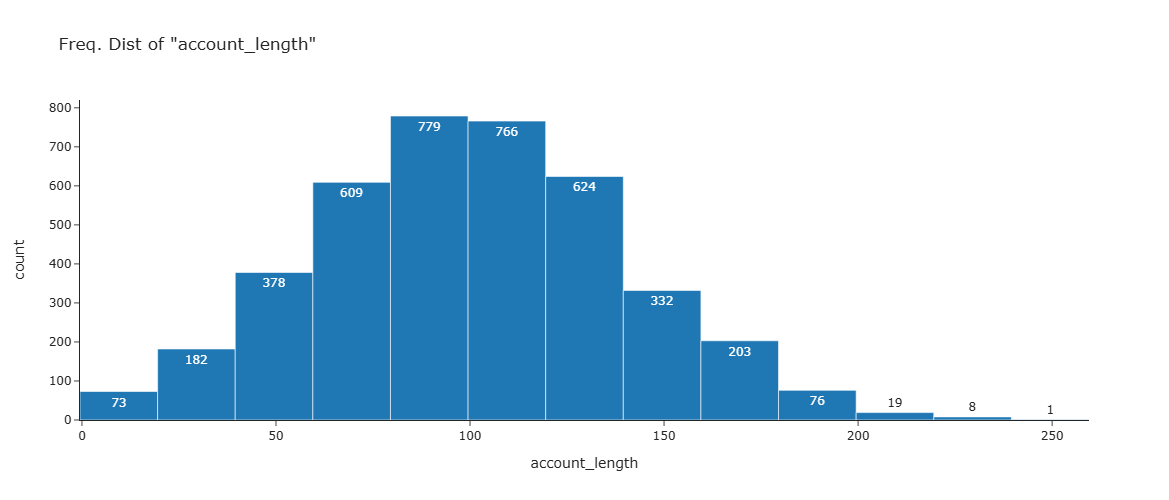

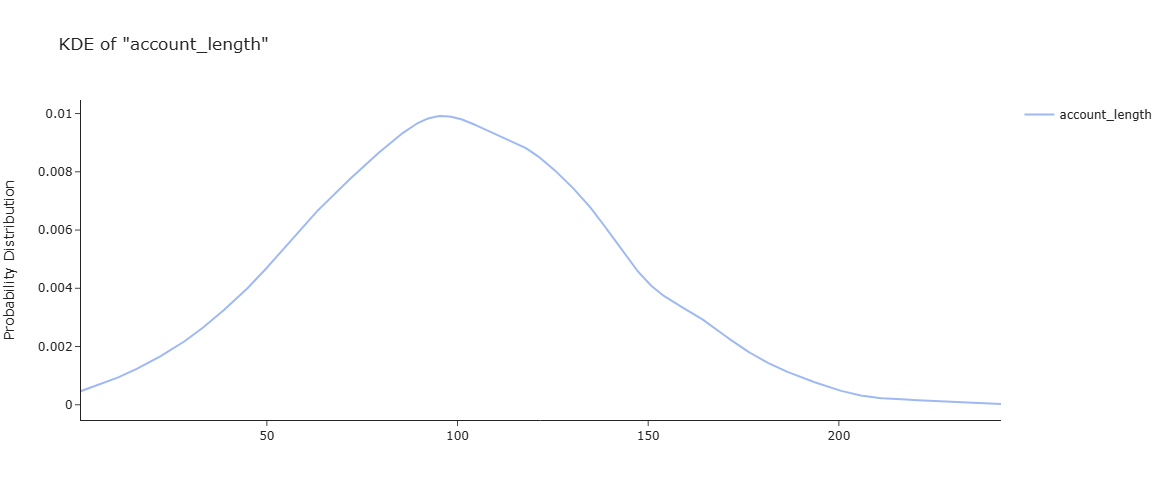

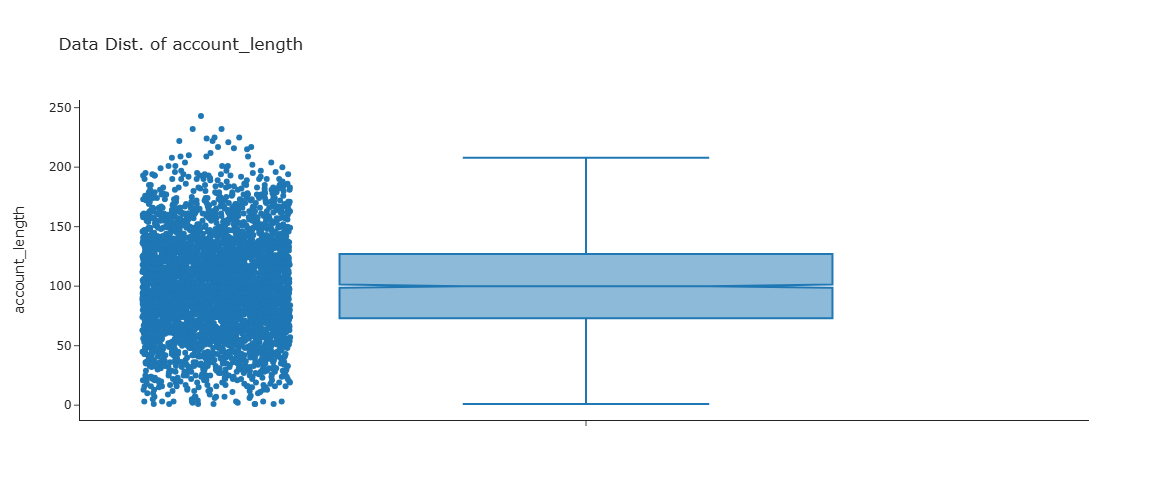

In [21]:
uni_flo_int(df,'account_length')

### 3.7 Analyizing Individual "category" Type Features

In [17]:
fea_obj

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [18]:
uni_obj_cat(df,'churn')

Name of the Feature : "churn" 

-------- FEATURE DESCRIPTIVE STATISTICS SUMMARY ---------
count     4050
unique       2
top         no
freq      3480
Name: churn, dtype: object 

----------------- MISSING VALUE SUMMARY ----------------
"churn" has 0 missing values, which is 0.0 %. 

-------------- FEATURE CLASS DISTRIBUTION ---------------
Total Categories : 2 

Showing Top "2" Categories of "churn" Feature 


  churn  Count  Percent
0    no   3480  85.9259
1   yes    570  14.0741





## 4. Saving Figure

### 4.1 HTML File

In [19]:
# fig.write_html('file.html')

### 4.2 PNG File
###### ’png’, 'jpg’ or ‘jpeg’, 'webp’, ’svg’, ’pdf’
###### ’eps' - require poppler lib to be installed
###### engines - 'kaliedo', 'orca'

In [20]:
# fig.write_image('file.png')   